<a href="https://colab.research.google.com/github/DaliaEl-Sayed/DEPI---Generative-AI-Track-Tasks./blob/main/mnist_dataset_using_encoder_decoder_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt
from keras.models import Sequential, Model


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [39]:
# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to 2D images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


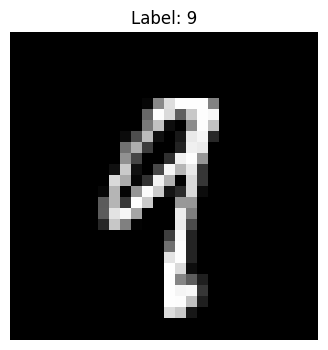

In [40]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
# Display a sample image
sample_index = np.random.randint(0, len(X_train))
sample_image = X_train[sample_index]
sample_label = y_train[sample_index]

plt.figure(figsize=(4, 4))
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Label: {sample_label}")
plt.axis('off')
plt.show()

In [41]:
# Add noise to the training images
noise_factor = 0.3
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

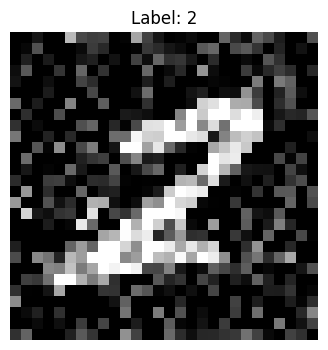

In [42]:
# Display a noise image
sample_index = np.random.randint(0, len(X_train))
sample_image = X_train_noisy[sample_index]
sample_label = y_train[sample_index]

plt.figure(figsize=(4, 4))
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Label: {sample_label}")
plt.axis('off')
plt.show()

In [43]:
# Flatten the input images
X_train_flat = X_train_noisy.reshape(X_train_noisy.shape[0], -1)
X_test_flat = X_test_noisy.reshape(X_test_noisy.shape[0], -1)

# Define the encoder-decoder model
input_size = 784  # 28x28 flattened image
encoding_size_1 = 128  # Size of the encoded representation 1
encoding_size_2 = 64   # Size of the encoded representation 2
encoding_size_3 = 32   # Size of the encoded representation 3

# Encoder
encoder_input = Input(shape=(input_size,))
encoded = Dense(encoding_size_1, activation='relu')(encoder_input)
encoded = Dense(encoding_size_2, activation='relu')(encoded)
encoded = Dense(encoding_size_3, activation='relu')(encoded)
encoder = Model(encoder_input, encoded)

# Decoder
decoder_input = Input(shape=(encoding_size_3,))
decoded = Dense(encoding_size_2, activation='relu')(decoder_input)
decoded = Dense(encoding_size_1, activation='relu')(decoded)
decoded = Dense(input_size, activation='sigmoid')(decoded)
decoder = Model(decoder_input, decoded)

# Combined model
autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')




In [44]:
# Train the model
autoencoder.fit(X_train_flat, X_train_flat,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_flat, X_test_flat))


Epoch 1/50
469/469 [==============================] - 5s 6ms/step - loss: 0.4608 - val_loss: 0.4340
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4289 - val_loss: 0.4235
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4211 - val_loss: 0.4175
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4172 - val_loss: 0.4155
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4150 - val_loss: 0.4131
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4133 - val_loss: 0.4118
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4120 - val_loss: 0.4106
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4110 - val_loss: 0.4103
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4103 - val_loss: 0.4093
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4098 - val_loss: 0.4089

In [47]:
# Evaluate the model
mse = autoencoder.evaluate(X_test_flat, X_test_flat, verbose=0)
print(f"Mean Squared Error: {mse:.4f}")

# Denoise a sample image
sample_image = X_test[0]
noisy_image = sample_image + 0.3 * np.random.normal(loc=0.0, scale=1.0, size=sample_image.shape)
encoded_image = encoder.predict(sample_image.reshape(1, -1))
decoded_image = decoder.predict(encoded_image)[0]




Mean Squared Error: 0.4039
1/1 [==============================] - 0s 17ms/step


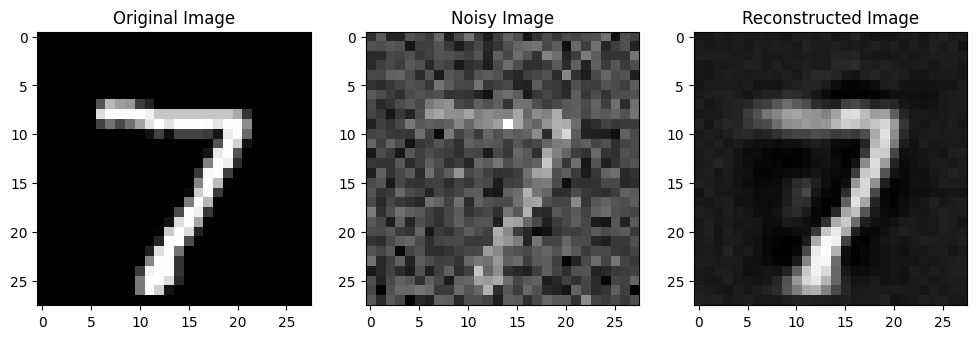

In [48]:
# Plot the original, noisy, and reconstructed images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(sample_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1, 3, 3)
plt.imshow(decoded_image.reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.show()